In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import boxcox

import re

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv(r"C:\Users\A.Ranjith Kiran\Downloads\laptop_details.csv")

In [5]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [6]:
df.shape

(720, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [8]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,581.0,4.32117,0.282872,3.0,4.2,4.3,4.5,5.0


In [10]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [11]:
df.duplicated().sum()

297

In [20]:
df.MRP.head()

0    ₹36,990
1    ₹39,990
2    ₹32,990
3    ₹49,990
4    ₹49,990
Name: MRP, dtype: object

In [23]:
df['MRP'] = df['MRP'].str.replace('₹','')
df['MRP'] = df['MRP'].str.replace(',','').astype('float32')

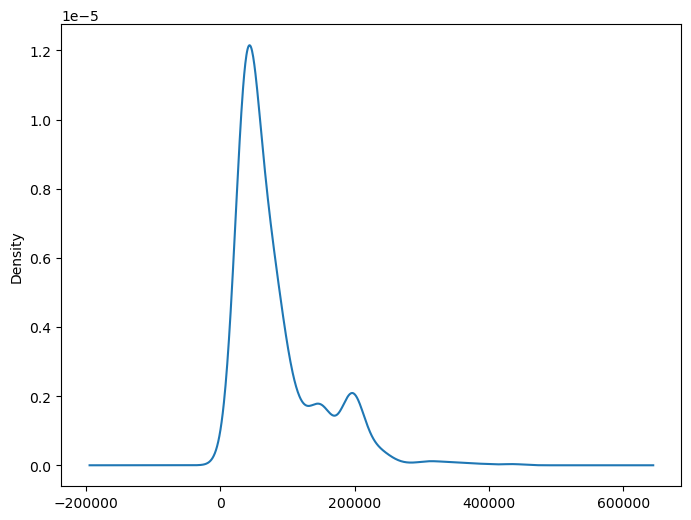

In [24]:
df.MRP.plot(kind='kde', figsize=(8,6))
plt.show()

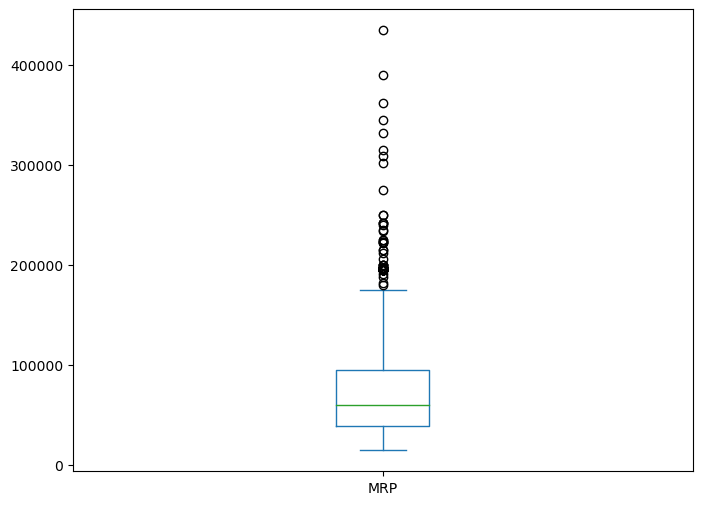

In [25]:
df.MRP.plot(kind='box', figsize=(8,6))
plt.show()

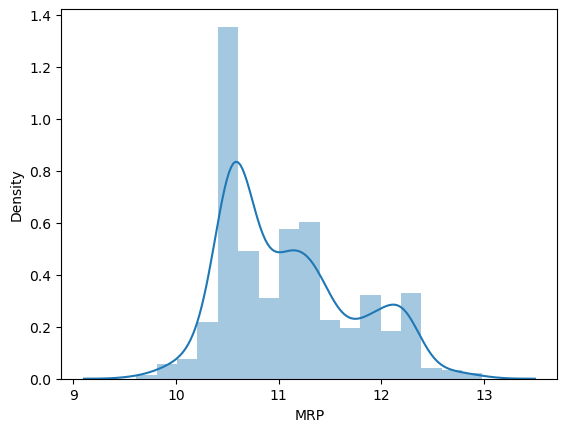

In [28]:
log = df.MRP.apply(np.log1p)
sns.distplot(log)
plt.show()

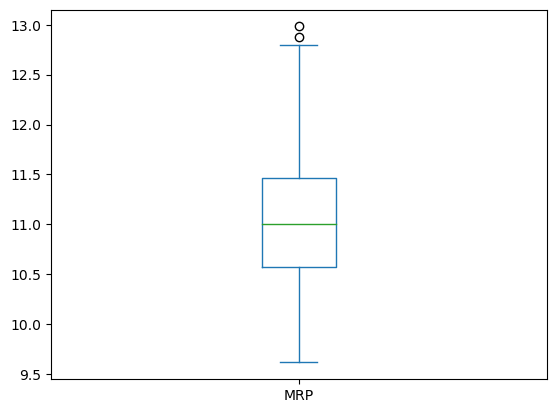

In [29]:
log.plot(kind='box')
plt.show()

In [30]:
percentile25 = df.MRP.quantile(0.25)
percentile75 = df.MRP.quantile(0.75)

In [32]:
percentile25

38996.75

In [33]:
percentile75

95240.0

In [34]:
iqr = percentile75 - percentile25
iqr

56243.25

In [35]:
X=df.drop(columns=['MRP'],axis=1)
Y= np.log(df['MRP'])

In [36]:
X.isnull().sum()

Product      0
Rating     139
Feature      0
dtype: int64

In [48]:
temp1 = df['Product'].str.split('GB', n=3, expand=True)

In [49]:
temp1

,0,1,2,3
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8,/256,SSD/Windows 11 Home) 14ITL05 Thin and Light L...,None
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8,/512,SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN ...,None
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8,/512,SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-...,None
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8,/512,SSD/Windows 10/4,Graphics/NVIDIA GeForce ...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8,/512,SSD/Windows 11 Home/4,Graphics/NVIDIA GeForce G...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,/64,EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...,None
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,/512,SSD/Windows 11 Home/4,Graphic...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,/1 TB SSD/Windows 11 Home/8,Graphics/NVIDIA ...,None
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,/512,SSD/Windows 11 Home) UP5...,None


In [50]:
temp1s = temp1[0]


In [51]:
temp1s = pd.DataFrame(temp1s)
temp1s

,0
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8
...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...


In [52]:
brand = temp1s[0].str.split().str[0]
brand.value_counts()

0
ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: count, dtype: int64

In [53]:
df['Brand Name'] = brand
df.head()

,Product,Rating,MRP,Feature,Brand Name
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [54]:
df['Brand Name'].value_counts()

Brand Name
ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: count, dtype: int64

In [55]:
df['Brand Name'] = df['Brand Name'].str.replace('realme','Others')
df['Brand Name'] = df['Brand Name'].str.replace('SAMSUNG','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Ultimus','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Vaio','Others')
df['Brand Name'] = df['Brand Name'].str.replace('GIGABYTE','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Nokia','Others')
df['Brand Name'] = df['Brand Name'].str.replace('ALIENWARE','DELL')

In [56]:
df['Brand Name'].value_counts()

Brand Name
ASUS         251
Lenovo       196
DELL          64
HP            61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
Others        13
Name: count, dtype: int64

In [57]:
regex_os = r'(Windows|MAC)'

# Function to extract the OS information from a string using regex
def extract_os(text):
    match = re.search(regex_os, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return "Others"

# Apply the function to the "Feature" column and create a new column with the OS information
df['OS'] = df['Feature'].apply(extract_os)
df['OS'].value_counts()

OS
Windows    690
Mac         19
Others      11
Name: count, dtype: int64

In [58]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows


In [59]:
regex_ram_type = r'(DDR[0-9L]*|LPDDR[0-9X]*)'

def extract_ram_type(text):
    match = re.search(regex_ram_type, text, re.IGNORECASE)
    if match:
        return match.group(0)
    else:
        return None

df['Ram Type'] = df['Feature'].apply(extract_ram_type)

df['Ram Type'].value_counts()

Ram Type
DDR4       561
DDR5        92
LPDDR4X     37
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: count, dtype: int64

In [60]:
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR5','Others')
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR4','Others')
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR3','Others')
df['Ram Type'].value_counts()

Ram Type
DDR4       561
DDR5        92
OthersX     37
Others      18
Name: count, dtype: int64

In [61]:
df['Ram Type'] = df['Ram Type'].str.replace('OthersX','Others')
df['Ram Type'].value_counts()

Ram Type
DDR4      561
DDR5       92
Others     55
Name: count, dtype: int64

In [62]:
df['Ram Type'].unique()

array(['DDR4', 'DDR5', 'Others', None], dtype=object)

In [65]:
regex_ram = r'(\d+)\s*(?:GB|MB)(?:\s*DDR\d)?'

# Function to extract RAM information from a string using regex
def extract_ram(text):
    match = re.search(regex_ram, text, re.IGNORECASE)
    if match:
        return f"{match.group(1)}GB"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the RAM information
df['RAM'] = df['Feature'].apply(extract_ram)

# Print the count of each RAM 
df['RAM'].value_counts()

RAM
8GB      400
16GB     263
4GB       38
32GB      17
128GB      2
Name: count, dtype: int64

In [66]:
df['RAM'] = df['RAM'].str.replace('8GB','8')
df['RAM'] = df['RAM'].str.replace('16GB','16')
df['RAM'] = df['RAM'].str.replace('4GB','4')
df['RAM'] = df['RAM'].str.replace('32GB','32')
df['RAM'] = df['RAM'].str.replace('128GB','32')
df['RAM'] = df['RAM'].str.replace('128','32')

In [67]:
df['RAM'].value_counts()

RAM
8     400
16    263
4      38
32     19
Name: count, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    float32
 3   Feature     720 non-null    object 
 4   Brand Name  720 non-null    object 
 5   OS          720 non-null    object 
 6   Ram Type    708 non-null    object 
 7   RAM         720 non-null    object 
dtypes: float32(1), float64(1), object(6)
memory usage: 42.3+ KB


In [69]:
temp1[1]

0                             /256 
1                             /512 
2                             /512 
3                             /512 
4                             /512 
                   ...             
715                            /64 
716                           /512 
717    /1 TB SSD/Windows 11 Home/8 
718                           /512 
719                  /1 TB HDD/256 
Name: 1, Length: 720, dtype: object

In [70]:
DISKSIZE =  temp1[1]
DISKSIZE

0                             /256 
1                             /512 
2                             /512 
3                             /512 
4                             /512 
                   ...             
715                            /64 
716                           /512 
717    /1 TB SSD/Windows 11 Home/8 
718                           /512 
719                  /1 TB HDD/256 
Name: 1, Length: 720, dtype: object

In [71]:
DISKSIZE.value_counts()

1
/512                                                                375
/256                                                                 99
/1 TB SSD/Windows 11 Home/4                                          38
/1 TB SSD/Windows 11 Hom...                                          31
/1 TB SSD/Windows 11 Home/8                                          27
/1 TB HDD/256                                                        26
/1 TB SSD/Win...                                                     25
/1 TB SSD/Windows 11 Home/6                                          11
/128                                                                  8
/64                                                                   7
/1 TB SSD/Windows 10 Home/4                                           6
/1 TB SSD/Windows 11 ...                                              6
/1 TB SSD/Windows 10 Home/6                                           5
/1 TB SSD/Windows 10 Home/8                                   

In [72]:
DISKSIZE = DISKSIZE.str.replace('/','')

In [73]:
DISKSIZE.value_counts()

1
512                                                               375
256                                                                99
1 TB SSDWindows 11 Home4                                           38
1 TB SSDWindows 11 Hom...                                          31
1 TB SSDWindows 11 Home8                                           27
1 TB HDD256                                                        26
1 TB SSDWin...                                                     25
1 TB SSDWindows 11 Home6                                           11
128                                                                 8
64                                                                  7
1 TB SSDWindows 10 Home4                                            6
1 TB SSDWindows 11 ...                                              6
1 TB SSDWindows 10 Home6                                            5
1 TB SSDWindows 10 Home8                                            4
1 TB SSDWindows 11

In [74]:
DISKSIZE = DISKSIZE.str.split().str[0]
DISKSIZE = DISKSIZE.astype('int')
DISKSIZE

0      256
1      512
2      512
3      512
4      512
      ... 
715     64
716    512
717      1
718    512
719      1
Name: 1, Length: 720, dtype: int32

In [75]:
df['DISK SIZE'] = DISKSIZE

In [76]:
df['DISK SIZE'] = df['DISK SIZE'].replace(1,1024)
df['DISK SIZE'] = df['DISK SIZE'].replace(2,2048)

In [77]:
df['DISK SIZE'].value_counts()

DISK SIZE
512     375
1024    223
256      99
128       8
64        7
2048      7
32        1
Name: count, dtype: int64

In [78]:
df['DISK SIZE'] = df['DISK SIZE'].replace(32,128)
df['DISK SIZE'] = df['DISK SIZE'].replace(64,128)
df['DISK SIZE'] = df['DISK SIZE'].replace(2048,1024)
df['DISK SIZE'].value_counts()

DISK SIZE
512     375
1024    230
256      99
128      16
Name: count, dtype: int64

In [79]:
regex_processor = r'(?:Intel|AMD)\s+[A-Za-z\d]+'

# Function to extract processor name from a string using regex
def extract_processor(text):
    match = re.search(regex_processor, text, re.IGNORECASE)
    if match:
        return match.group()
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the processor information
df['Processor'] = df['Feature'].apply(extract_processor)
df['Processor'].value_counts()

Processor
Intel Core       355
AMD Ryzen        307
Intel Celeron     23
Intel Pentium      5
Intel i3           3
AMD Athlon         2
Intel Evo          2
Intel PQC          1
AMD Dual           1
Intel i7           1
Name: count, dtype: int64

In [80]:
def extract_processor_brand(text):
    if re.search(r"intel", text, re.IGNORECASE):
        return "Intel"
    elif re.search(r"amd", text, re.IGNORECASE):
        return "AMD"
    else:
        return "Others"

# Apply the function to the "Feature" column and create a new column with the processor brand information
df['Processor'] = df['Feature'].apply(extract_processor_brand)
df['Processor'].value_counts()

Processor
Intel     390
AMD       310
Others     20
Name: count, dtype: int64

In [81]:
df['Processor'].unique()

array(['Intel', 'AMD', 'Others'], dtype=object)

In [82]:
regex_gpu = r'(\bNVIDIA\b|\bAMD\b).*?(\d+)\s*GB'

# Function to extract GPU information from a string using regex
def extract_gpu(text):
    match = re.search(regex_gpu, text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} {match.group(2)} GB"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the GPU information
df['GPU'] = df['Feature'].apply(extract_gpu)
df['GPU'].value_counts()

GPU
AMD 16 GB        155
AMD 8 GB         146
AMD 32 GB          4
NVIDIA 16 GB       3
NVIDIA 8 GB        2
NVIDIA 2 GB        1
AMD 4 GB           1
NVIDIA 4 GB        1
NVIDIA 32 GB       1
NVIDIA 128 GB      1
Name: count, dtype: int64

In [83]:
regex_gpu = r'(NVIDIA|AMD|Intel)\s[\w\s]+\d{3,4}'

# Function to extract GPU information from a string using regex
def extract_gpu(text):
    match = re.search(regex_gpu, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return 'Others'

# Apply the function to the "Feature" column and create a new column with the GPU information
df['GPU'] = df['Feature'].apply(extract_gpu)
df['GPU'].value_counts()

GPU
Others    533
AMD       156
Intel      20
NVIDIA     11
Name: count, dtype: int64

In [84]:
regex_warranty = r'(\d+)\s*(?:year|yr|y)(?:s)?'

# Function to extract warranty information from a string using regex
def extract_warranty(text):
    match = re.search(regex_warranty, text, re.IGNORECASE)
    if match:
        years = int(match.group(1))
        if years == 1:
            return f"{years} year warranty"
        elif years > 1:
            return f"{years} years warranty"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the warranty information
df['Warranty'] = df['Feature'].apply(extract_warranty)
df['Warranty'].value_counts()

Warranty
1 year warranty         479
2 years warranty         85
20212 years warranty     68
20211 years warranty     41
20191 years warranty     31
20193 years warranty      4
3 years warranty          4
32 years warranty         3
20192 years warranty      3
3652 years warranty       1
Name: count, dtype: int64

In [85]:
df['Warranty'] = df['Warranty'].str.replace('1 year warranty','1')
df['Warranty'] = df['Warranty'].str.replace('2 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20212 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20211 years warranty','1')
df['Warranty'] = df['Warranty'].str.replace('20191 years warranty','1')
df['Warranty'] = df['Warranty'].str.replace('20193 years warranty','3')
df['Warranty'] = df['Warranty'].str.replace('3 years warranty','3')
df['Warranty'] = df['Warranty'].str.replace('32 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20192 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('3652 years warranty','2')

In [86]:
df.Warranty.value_counts()

Warranty
1        551
2         85
20212     68
3          8
32         3
20192      3
3652       1
Name: count, dtype: int64

In [89]:
df['Warranty'] = df['Warranty'].str.replace('20212','2')
df['Warranty'] = df['Warranty'].str.replace('32','2')
df['Warranty'] = df['Warranty'].str.replace('20192','2')
df['Warranty'] = df['Warranty'].str.replace('20212','2')
df['Warranty'] = df['Warranty'].str.replace('3652','2')

In [90]:
df.Warranty.value_counts()

Warranty
1    551
2    160
3      8
Name: count, dtype: int64

In [91]:
df['Warranty'] = df['Warranty'].str.replace('3','2')
df.Warranty.value_counts()

Warranty
1    551
2    168
Name: count, dtype: int64

In [93]:
df.Warranty.fillna('2',inplace=True)

In [94]:
df.Warranty.unique()

array(['2', '1'], dtype=object)

In [95]:
regex = r'(\d+(?:\.\d+)?)(?:\s*inch|"|\'\')'

# Function to extract screen sizes from a string using regex

def extract_screen_size(text):
    match = re.search(regex, text)
    if match:
        return float(match.group(1))
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the screen sizes

df['ScreenSize'] = df['Feature'].apply(extract_screen_size)

In [96]:
df.ScreenSize.value_counts()

ScreenSize
15.6        362
14.0        103
13.3          9
16.0          6
16.1          5
16.2          5
17.3          5
14.1          4
11.6          4
15.0          4
14.2          2
13.0          1
13.5          1
16.6          1
206015.6      1
Name: count, dtype: int64

In [97]:
df['ScreenSize'] = df['ScreenSize'].astype('float64')

In [98]:
df['ScreenSize'] = df['ScreenSize'].replace(16.0, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(13.3, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(16.1, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(16.2, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(17.3, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(14.1, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(11.6, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(15.0, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(14.2, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(13.0, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(16.6, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(206015.6, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(13.5, 14.0)
df['ScreenSize'].value_counts()

ScreenSize
15.6    389
14.0    124
Name: count, dtype: int64

In [99]:
df['ScreenSize'].sample(5)

104    15.6
695    14.0
599    15.6
209    15.6
664    15.6
Name: ScreenSize, dtype: float64

In [100]:
df = df.rename(columns={'MRP': 'Price'})

In [102]:
df = df[['Brand Name','OS','Ram Type','RAM','Processor','GPU','Warranty','ScreenSize','DISK SIZE', 'Price']]

In [103]:
df.to_csv("cleaned.csv")

In [104]:
y = df.iloc[:,-1]

In [105]:
y

0       36990.0
1       39990.0
2       32990.0
3       49990.0
4       49990.0
         ...   
715     23490.0
716     73490.0
717    194990.0
718    125990.0
719     50990.0
Name: Price, Length: 720, dtype: float32

In [106]:
y = np.log1p(y)

In [107]:
y

0      10.518430
1      10.596410
2      10.403990
3      10.819598
4      10.819598
         ...    
715    10.064373
716    11.204918
717    12.180709
718    11.743966
719    10.839404
Name: Price, Length: 720, dtype: float32

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [109]:
X_train.head()

,Product,Rating,Feature
135,Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 ...,4.2,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...
548,HP Core i7 12th Gen - (32 GB/1 TB SSD/Windows ...,NaN,Intel Core i7 Processor (12th Gen)32 GB DDR5 R...
235,ASUS EeeBook 14 with NumberPad Pentium Silver ...,4.1,Intel Pentium Silver Processor8 GB DDR4 RAM64 ...
39,ASUS Vivobook 14 (2022) Core i5 12th Gen - (16...,4.7,Intel Core i5 Processor (12th Gen)16 GB DDR4 R...
554,HP Laptop with Backlit Keyboard Core i3 11th G...,4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...


In [114]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe2,open('pipe.pkl','wb'))